Importing the libraries

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Importing the training dataset

In [39]:
dataset = pd.read_csv('bank_loan_main_shrt.csv')
#Through there are many independent variables in Dataset, we will use only columns:
#Current Loan Amount, Term, Credit Score, Annual Income, Years in current job, Number of Credit Problems, Current Credit Balance, Bankruptcies,Tax Liens.
#X = dataset.iloc[:, [3,4,5,6,8,15,16,18,19]].values  #exluded some columns
#y = dataset.iloc[:, 2].values    #status of loan


In [40]:
dataset.drop(["Loan ID", "Customer ID", "Home Ownership", "Purpose","Monthly Debt","Months since last delinquent","Number of Open Accounts",\
              "Maximum Open Credit","Unnamed: 19","Unnamed: 20","Unnamed: 21","Unnamed: 22","Unnamed: 23","Unnamed: 24","Unnamed: 25","Unnamed: 26"], axis =1, inplace=True)
#dataset.drop(["Loan ID", "Customer ID", "Home Ownership", "Purpose","Monthly Debt","Months since last delinquent","Number of Open Accounts",\
#              "Maximum Open Credit"], axis =1, inplace=True)

Taking care of missing data

In [41]:
dataset.dropna(inplace = True)  #droping rows with null

In [42]:
Loan_Status = dataset[["Loan Status"]]
dataset = dataset.drop(["Loan Status"], axis=1)
dataset = pd.concat([dataset, Loan_Status], axis =1 )
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 566 entries, 0 to 734
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Current Loan Amount        566 non-null    int64  
 1   Term                       566 non-null    object 
 2   Credit Score               566 non-null    float64
 3   Annual Income              566 non-null    float64
 4   Years in current job       566 non-null    float64
 5   Years of Credit History    566 non-null    float64
 6   Number of Credit Problems  566 non-null    int64  
 7   Current Credit Balance     566 non-null    int64  
 8   Bankruptcies               566 non-null    int64  
 9   Tax Liens                  566 non-null    int64  
 10  Loan Status                566 non-null    object 
dtypes: float64(4), int64(5), object(2)
memory usage: 53.1+ KB


In [43]:
X = dataset.iloc[:, [0,1,2,3,4,5,6,7,8,9]].values
y = dataset.iloc[:, 10].values    #status of loan

Encoding the Independent Variable (col: Loan_Term)

In [44]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder  #import class that will proceed with encoding
ColTrnsfm = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ColTrnsfm.fit_transform(X))


In [45]:
X_train

array([[0.0, 1.0, -0.7117756699601541, ..., -0.511145720158929,
        -0.36159899874113766, -0.13215474336335026],
       [0.0, 1.0, -0.46990875348459554, ..., -0.5554140089503345,
        -0.36159899874113766, -0.13215474336335026],
       [0.0, 1.0, -0.351800843336484, ..., 0.033904114107147235,
        -0.36159899874113766, -0.13215474336335026],
       ...,
       [0.0, 1.0, -0.9641073890878094, ..., -0.3124105416198461,
        -0.36159899874113766, -0.13215474336335026],
       [0.0, 1.0, -1.3448114639693147, ..., -0.6999385854060902,
        -0.36159899874113766, -0.13215474336335026],
       [0.0, 1.0, -0.9069645319944016, ..., -0.68499734364337,
        -0.36159899874113766, -0.13215474336335026]], dtype=object)

Encoding the Dependent Variable (Col: Loan_Status)

In [46]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

**Splitting the Dataset into the training and Test Sets**

In [47]:
#3. Splitting the Dataset into the training and Test Sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

**Feature Scaling - Standardisation**

In [48]:
#Standardisation-recommended [-3:3] vs Normalisation [0:1] for specifc situations
#note: dont apply to encoded indep variables
from sklearn.preprocessing import StandardScaler #Standartisation 
sc = StandardScaler()
X_train[:, 2:] = sc.fit_transform(X_train[:, 2:])
X_test[:, 2:] = sc.transform(X_test[:, 2:])

**Training the SVM Model on the Training DataSet**

In [49]:
# 5.3 Training the model on the Training Set (SVM)
from sklearn.svm import SVC
classifier = SVC(kernel= 'linear')
classifier.fit(X_train, y_train)



SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

**Get Feature Importance, prepare summary report and make visualization**

In [51]:
features = ['ShortTerm', 'LongTerm', 'Current Loan Amount', 'Credit Score', 'Annual Income',\
                  'Years in current job', 'Years of Credit History',\
                  'Number of Credit Problems', 'Current Credit Balance', 'Bankruptcies',\
                  'Tax Liens']

In [52]:
X_train[0:2, :]

array([[0.0, 1.0, -0.7117756699601541, -0.24849686260106174,
        -0.048771253011145495, 0.3187041992668317, -1.1188634524909182,
        -0.35946937773700843, -0.511145720158929, -0.36159899874113766,
        -0.13215474336335026],
       [0.0, 1.0, -0.46990875348459554, -0.22168150801829556,
        -1.0955875504319073, -1.333926371309932, -1.7272376734477561,
        -0.35946937773700843, -0.5554140089503345, -0.36159899874113766,
        -0.13215474336335026]], dtype=object)

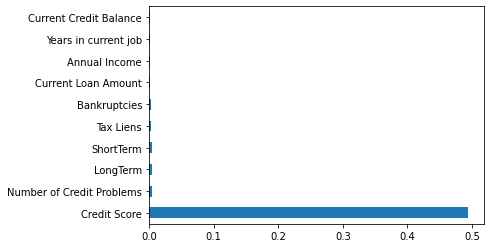

In [55]:
pd.Series(abs(classifier.coef_[0]), index=features).nlargest(10).plot(kind='barh')

We see that most influencing feature to the result is customer's credit score. So we will build our app for deployment using credit score of customers and wil ltry to predict if this customer will be able to fully pay for loan or not.